In [5]:
pip install tensorflow

  Using cached tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00


In [12]:
!pip install opencv-python

###Import of necessary modules

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import seaborn as sns
import cv2
import os


###Importing images from the Dataset

In [34]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/DataSet/train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DataSet/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 3826 files belonging to 2 classes.
Found 3826 files belonging to 2 classes.


###Scaling of Images

In [35]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


###Convolutional Neural Network Model

In [36]:
##CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [63]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [64]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
120/120 [==============================] - 32s 234ms/step - loss: 0.6767 - accuracy: 0.6662 - val_loss: 0.6384 - val_accuracy: 0.6764
Epoch 2/10
120/120 [==============================] - 36s 297ms/step - loss: 0.6769 - accuracy: 0.6704 - val_loss: 0.7258 - val_accuracy: 0.6662
Epoch 3/10
120/120 [==============================] - 36s 296ms/step - loss: 0.5711 - accuracy: 0.6999 - val_loss: 0.5640 - val_accuracy: 0.7036
Epoch 4/10
120/120 [==============================] - 36s 295ms/step - loss: 0.5433 - accuracy: 0.7070 - val_loss: 0.5825 - val_accuracy: 0.6916
Epoch 5/10
120/120 [==============================] - 36s 297ms/step - loss: 0.4813 - accuracy: 0.7554 - val_loss: 0.4287 - val_accuracy: 0.7838
Epoch 6/10
120/120 [==============================] - 36s 297ms/step - loss: 0.3905 - accuracy: 0.8144 - val_loss: 0.3027 - val_accuracy: 0.8936
Epoch 7/10
120/120 [==============================] - 36s 296ms/step - loss: 0.3695 - accuracy: 0.8421 - val_loss: 0.4439 - val_ac

###Plotting the Accuracy

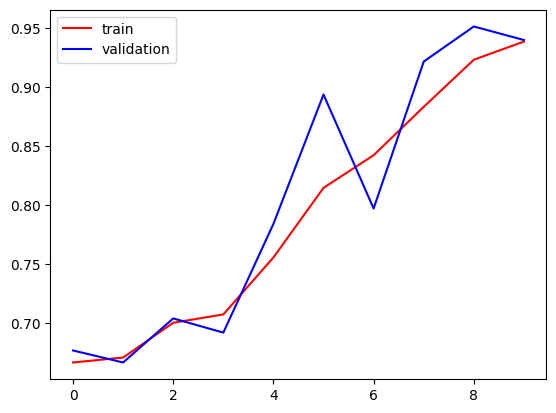

In [65]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

###Plotting the Loss Graph

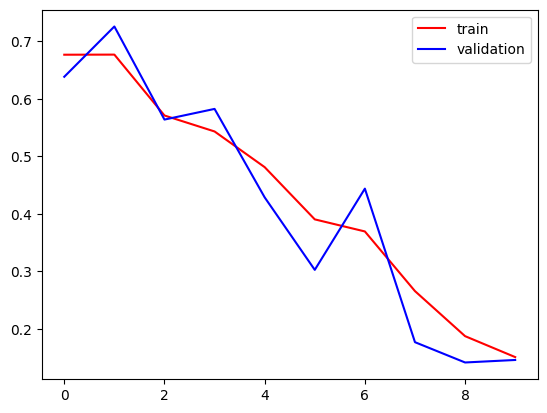

In [66]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

###Checking the model on new data

In [67]:
test_img = cv2.imread('/content/benign.png')

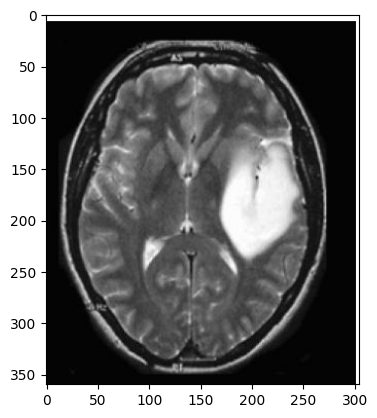

In [68]:
plt.imshow(test_img)

In [69]:
test_img.shape

(360, 305, 3)

In [72]:
test_img = cv2.imread('/content/Malignant.png')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape(1, 256, 256, 3)

In [73]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)